#### Load the predicted adata

In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import scvelo as scv
import os
import matplotlib.pyplot as plt
import torch
import sys
sys.path.append("..")

In [2]:
dataset_name = 'GCB'
sample_name = 'CtcfWT29'
model_type = 'DynaVelo'
num_hidden = 200
zx_dim = 50
zy_dim = 50
k_z0 = 1000
k_t = 1000
k_velocity = 10000
k_consistency = 10000
seed = 0

model_suffix = f'{dataset_name}_{sample_name}_{model_type}_num_hidden_{num_hidden}_zxdim_{zx_dim}_zydim_{zy_dim}_k_z0_{str(k_z0)}_k_t_{str(k_t)}_k_velocity_{str(k_velocity)}_k_consistency_{str(k_consistency)}_seed_{seed}'

# load predicted RNA
adata_rna_pred = sc.read_h5ad(f"/media/labuser/STORAGE/sc-multiome/data/MelnickLab_GerminalCenter_BCells/processed_data_rna/predicted/RNA_Matrix_Pred_{model_suffix}.h5ad")

# load predicted ATAC
adata_atac_pred = sc.read_h5ad(f"/media/labuser/STORAGE/sc-multiome/data/MelnickLab_GerminalCenter_BCells/processed_data_atac/MotifMatrix/predicted/Motif_Matrix_Pred_{model_suffix}.h5ad")

# check if the cell names are the same
assert all(adata_rna_pred.obs_names == adata_atac_pred.obs_names)

In [7]:
print(f'Number of velocity genes = {adata_rna_pred.var["velocity_genes"].sum()}')

Number of velocity genes = 863


In [8]:
# check size of RNA and ATAC adata
print(f'Size of RNA matrix = {adata_rna_pred.shape}')
print(f'Size of motif matrix = {adata_atac_pred.shape}')

Size of RNA matrix = (7166, 2623)
Size of motif matrix = (7166, 169)


#### Set celltype colors

In [3]:
adata_atac_pred.obs['final.celltype'] = pd.Categorical(adata_atac_pred.obs['final.celltype'], categories=['Centroblast', 'Transitioning', 'Centrocyte', 'Plasmablast', 'Prememory'], ordered=True)
adata_atac_pred.obs['fine.celltype'] = pd.Categorical(adata_atac_pred.obs['fine.celltype'], categories=['Centroblast', 'Transitioning_CB_CC', 'Centrocyte', 'Transitioning_Sphase', 'CB_Rec_Sphase', 'CB_S_G2M', 'CB_G2M', 'Recycling', 'CC_Rec', 'Plasmablast', 'Prememory'], ordered=True)
adata_atac_pred.uns['final.celltype_colors'] = ['#74c476', '#9ecae1', '#3182bd', '#1be7ff', '#e2a0ff']
adata_atac_pred.uns['fine.celltype_colors'] = ['#deebf7', '#9ecae1', '#3182bd', '#edf8e9', '#bae4b3', '#74c476', '#238b45', '#d94701', '#fd8d3c', '#1be7ff', '#e2a0ff']

adata_rna_pred.obs['final.celltype'] = adata_atac_pred.obs['final.celltype']
adata_rna_pred.obs['fine.celltype'] = adata_atac_pred.obs['fine.celltype']
adata_rna_pred.uns['final.celltype_colors'] = adata_atac_pred.uns['final.celltype_colors']
adata_rna_pred.uns['fine.celltype_colors'] = adata_atac_pred.uns['fine.celltype_colors']

#### Fig 2A

computing velocity graph (using 1/24 cores)


  0%|          | 0/7166 [00:00<?, ?cells/s]

    finished (0:00:23) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ../figures/Fig2/vx_pred_x_obs_stream_velocity_genes_GCB_CtcfWT29_DynaVelo_num_hidden_200_zxdim_50_zydim_50_k_z0_1000_k_t_1000_k_velocity_10000_k_consistency_10000_seed_0.pdf


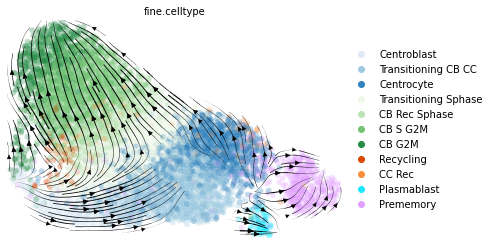

In [30]:
fig_dir = f'../figures/Fig2'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

adata_rna_pred.layers['velocity'] = adata_rna_pred.layers['vx_pred_mean'].copy()
velocity_genes = adata_rna_pred.var['velocity_genes'][adata_rna_pred.var['velocity_genes']].index.values
scv.tl.velocity_graph(adata_rna_pred, xkey='X', vkey='velocity', gene_subset=velocity_genes, sqrt_transform=False)
scv.pl.velocity_embedding_stream(adata_rna_pred, color=['fine.celltype'], basis='umap', legend_loc='right margin', save=fig_dir+f'/vx_pred_x_obs_stream_velocity_genes_{model_suffix}.pdf')

computing velocity graph (using 1/24 cores)


  0%|          | 0/7166 [00:00<?, ?cells/s]

    finished (0:01:40) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
figure cannot be saved as pdf, using png instead.
saving figure to file ../figures/Fig2/vx_pred_x_obs_stream_all_genes_GCB_CtcfWT29_DynaVelo_num_hidden_200_zxdim_50_zydim_50_k_z0_1000_k_t_1000_k_velocity_10000_k_consistency_10000_seed_0.png


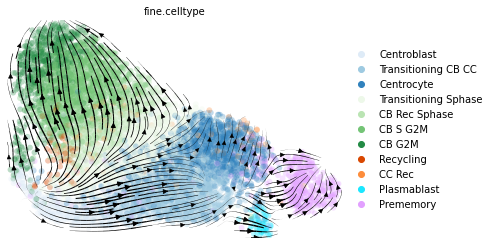

In [31]:
scv.tl.velocity_graph(adata_rna_pred, xkey='X', vkey='velocity', gene_subset=adata_rna_pred.var_names, sqrt_transform=False)
scv.pl.velocity_embedding_stream(adata_rna_pred, color=['fine.celltype'], basis='umap', legend_loc='right margin', save=fig_dir+f'/vx_pred_x_obs_stream_all_genes_{model_suffix}.pdf')

computing velocity graph (using 1/24 cores)


  0%|          | 0/7166 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
figure cannot be saved as pdf, using png instead.
saving figure to file ../figures/Fig2/vy_pred_y_obs_stream_GCB_CtcfWT29_DynaVelo_num_hidden_200_zxdim_50_zydim_50_k_z0_1000_k_t_1000_k_velocity_10000_k_consistency_10000_seed_0.png


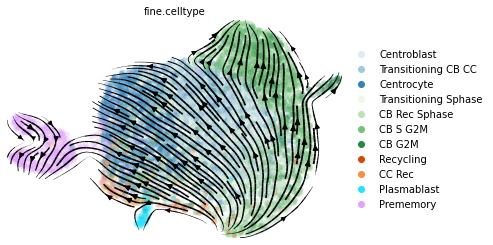

In [32]:
sc.pp.neighbors(adata_atac_pred, n_neighbors=50, use_rep='X')
sc.tl.umap(adata_atac_pred, min_dist=1, spread=1, random_state=0, n_components=2)
adata_atac_pred.layers['velocity'] = adata_atac_pred.layers['vy_pred_mean'].copy()
adata_atac_pred.layers['state'] = adata_atac_pred.X.copy()

scv.tl.velocity_graph(adata_atac_pred, xkey='state', vkey='velocity', gene_subset=adata_atac_pred.var_names, sqrt_transform=False)
scv.pl.velocity_embedding_stream(adata_atac_pred, color=['fine.celltype'], basis='umap', legend_loc='right margin', save=fig_dir+f'/vy_pred_y_obs_stream_{model_suffix}.pdf')

#### Fig 2B

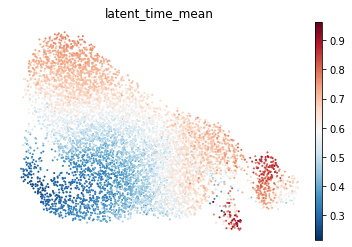

In [36]:
sc.pl.umap(adata_rna_pred, color=['latent_time_mean'], color_map='RdBu_r', show=False, frameon=False)
plt.savefig(fig_dir+f'/umap_RNA_latent_time_mean_{model_suffix}.pdf', bbox_inches="tight")

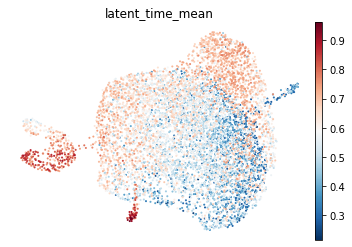

In [38]:
sc.pl.umap(adata_atac_pred, color=['latent_time_mean'], color_map='RdBu_r', show=False, frameon=False)
plt.savefig(fig_dir+f'/umap_motif_latent_time_mean_{model_suffix}.pdf', bbox_inches="tight")

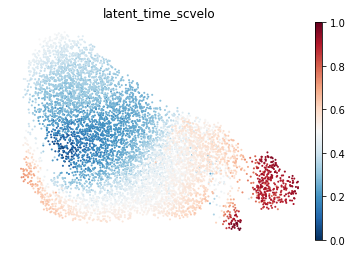

In [37]:
sc.pl.umap(adata_rna_pred, color=['latent_time_scvelo'], color_map='RdBu_r', show=False, frameon=False)
plt.savefig(fig_dir+f'/umap_RNA_latent_time_scvelo_{model_suffix}.pdf', bbox_inches="tight")

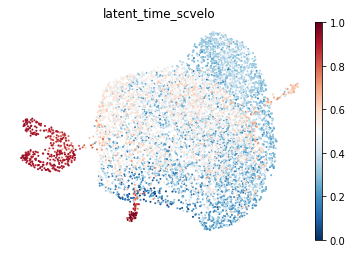

In [39]:
sc.pl.umap(adata_atac_pred, color=['latent_time_scvelo'], color_map='RdBu_r', show=False, frameon=False)
plt.savefig(fig_dir+f'/umap_motif_latent_time_scvelo_{model_suffix}.pdf', bbox_inches="tight")

#### Fig 2D

In [47]:
# Load the model
from dynavelo.models import DynaVelo

gpu = 0
device = torch.device('cuda:' + str(gpu) if torch.cuda.is_available() else 'cpu')
model = DynaVelo(x_dim=adata_rna_pred.shape[1], y_dim=adata_atac_pred.shape[1], device=device, sample_name=sample_name).to(device)

train_dir = f'../checkpoints/{dataset_name}/{sample_name}/'
ckpt_path = train_dir+model_suffix+'_main.pth'

if os.path.exists(ckpt_path):
    checkpoint = torch.load(ckpt_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    print('Loaded ckpt from {}'.format(ckpt_path))

Loaded ckpt from ../checkpoints/GCB/CtcfWT29/GCB_CtcfWT29_DynaVelo_num_hidden_200_zxdim_50_zydim_50_k_z0_1000_k_t_1000_k_velocity_10000_k_consistency_10000_seed_0_main.pth


In [49]:
adata_rna_pred.obs['latent_time_mean'].sort_values().index

Index(['CtcfWT29#GTAAGCAAGGCAGGTG-1', 'CtcfWT29#AGTGTGGCAGGCCAAA-1',
       'CtcfWT29#TGCAAGCGTCAAAGAA-1', 'CtcfWT29#TTTAGCTTCGTTAGTA-1',
       'CtcfWT29#ACGTTGTAGCTCCCTG-1', 'CtcfWT29#GCCCGTTGTAGTTACG-1',
       'CtcfWT29#CGTAACCCACCAAAGG-1', 'CtcfWT29#GGTTTCTGTGATCAGC-1',
       'CtcfWT29#CGGGCTTAGTAAGAAC-1', 'CtcfWT29#CAGGCTGGTGTTTGCT-1',
       ...
       'CtcfWT29#TACTCAAAGAGAGGAG-1', 'CtcfWT29#ACCTTGTGTAAGGTCC-1',
       'CtcfWT29#TGCTTGCTCTTGTTCG-1', 'CtcfWT29#AAGCCACGTTTAAAGC-1',
       'CtcfWT29#GATGGCTGTGGGAACA-1', 'CtcfWT29#TGGATTGGTGGTTCTT-1',
       'CtcfWT29#GCTGATCCACGAACAG-1', 'CtcfWT29#CAATGTCAGCTGGACC-1',
       'CtcfWT29#TATTAGCCATTCAGCA-1', 'CtcfWT29#GAAACCCGTGGAAGGC-1'],
      dtype='object', length=7166)

In [52]:
adata_rna_pred.obs.loc[adata_rna_pred.obs['latent_time_mean'].sort_values().index, 'rank_cell'] = np.arange(adata_rna_pred.shape[0]).astype(str)
adata_rna_pred.obs['rank_cell'] = adata_rna_pred.obs['rank_cell'].astype('category')
adata_atac_pred.obs['rank_cell'] = adata_rna_pred.obs['rank_cell']

celltype = 'Centroblast'
terminal_cells_cell_cycle = adata_rna_pred[adata_rna_pred.obs['final.celltype']=='Centroblast'].obs['latent_time_mean'].sort_values(ascending=False).index

In [57]:
terminal_cells_cell_cycle = adata_rna_pred[adata_rna_pred.obs['final.celltype']=='Centroblast'].obs['latent_time_mean'].sort_values(ascending=False).index[:10]
terminal_cells_cell_cycle

Index(['CtcfWT29#TTTCAGTTCATCCACC-1', 'CtcfWT29#TTCACTGTCCCTCACG-1',
       'CtcfWT29#CTAACCCTCCCTGTTA-1', 'CtcfWT29#TACGCACCAAGCTTAT-1',
       'CtcfWT29#CATGGATTCATAACCA-1', 'CtcfWT29#TCGGTTCTCCGCCTCA-1',
       'CtcfWT29#GAGTATCTCCAAGTTA-1', 'CtcfWT29#CTTGTCCAGTCAGGCC-1',
       'CtcfWT29#ACTATCCGTTCGCTTG-1', 'CtcfWT29#AAGCCTTAGCATGACT-1'],
      dtype='object')

In [55]:
terminal_cells_centrocyte = adata_rna_pred[adata_rna_pred.obs['final.celltype']=='Centrocyte'].obs['latent_time_mean'].sort_values(ascending=False).index[:10]
terminal_cells_centrocyte

Index(['CtcfWT29#CTTCATCCACTAAGAA-1', 'CtcfWT29#GCCTGTGCATTCCTGT-1',
       'CtcfWT29#CGGGCTTAGTACCGCA-1', 'CtcfWT29#GCGCTTAAGTTACCGG-1',
       'CtcfWT29#AGAACCGCAATAATCC-1', 'CtcfWT29#TCGCTAACATCTAGCA-1',
       'CtcfWT29#GGAAACTCATGTTGGC-1', 'CtcfWT29#TGGCGGTTCTTGTCTG-1',
       'CtcfWT29#TCAGTAATCTCGACCT-1', 'CtcfWT29#ACTAATCCAAACTGTT-1'],
      dtype='object')

In [63]:
terminal_cells = []
terminal_cells.append(terminal_cells_cell_cycle[1])
terminal_cells.append(terminal_cells_centrocyte[1])
terminal_cells

['CtcfWT29#TTCACTGTCCCTCACG-1', 'CtcfWT29#GCCTGTGCATTCCTGT-1']

In [64]:
t_max = 1.0
n_points = 101
n_rep = 50
n_terminal_cells = len(terminal_cells)
x_pred = np.zeros([n_terminal_cells, n_rep, n_points, adata_rna_pred.shape[1]])
y_pred = np.zeros([n_terminal_cells, n_rep, n_points, adata_atac_pred.shape[1]])
vx_pred = np.zeros([n_terminal_cells, n_rep, n_points, adata_rna_pred.shape[1]])
vy_pred = np.zeros([n_terminal_cells, n_rep, n_points, adata_atac_pred.shape[1]])
t_extend = np.zeros([n_terminal_cells, n_points])

for idx, cell in enumerate(terminal_cells):
    for m in range(n_rep):

        x_terminal = torch.tensor(adata_rna_pred[cell].X.toarray(), dtype=torch.float32).to(device)
        y_terminal = torch.tensor(adata_atac_pred[cell].X, dtype=torch.float32).to(device)

        with torch.no_grad():
            model.eval()
            x_pred_, y_pred_, vx_pred_, vy_pred_, t_extend_ = model.generate_trajectory(x_terminal, y_terminal, t_max, n_points)

        x_pred[idx, m, :, :] = x_pred_.detach().cpu().numpy()
        y_pred[idx, m, :, :] = y_pred_.detach().cpu().numpy()
        vx_pred[idx, m, :, :] = vx_pred_.detach().cpu().numpy()
        vy_pred[idx, m, :, :] = vy_pred_.detach().cpu().numpy()
    
    t_extend[idx, :] = t_extend_.detach().cpu().numpy()

t_extend = t_extend.reshape(n_terminal_cells*n_points)

x_pred_mean = np.mean(x_pred, axis=1).reshape([n_terminal_cells*n_points, x_pred.shape[-1]])
y_pred_mean = np.mean(y_pred, axis=1).reshape([n_terminal_cells*n_points, y_pred.shape[-1]])
vx_pred_mean = np.mean(vx_pred, axis=1).reshape([n_terminal_cells*n_points, x_pred.shape[-1]])
vy_pred_mean = np.mean(vy_pred, axis=1).reshape([n_terminal_cells*n_points, y_pred.shape[-1]])

x_pred_std = np.std(x_pred, axis=1).reshape([n_terminal_cells*n_points, x_pred.shape[-1]])
y_pred_std = np.std(y_pred, axis=1).reshape([n_terminal_cells*n_points, y_pred.shape[-1]])
vx_pred_std = np.std(vx_pred, axis=1).reshape([n_terminal_cells*n_points, x_pred.shape[-1]])
vy_pred_std = np.std(vy_pred, axis=1).reshape([n_terminal_cells*n_points, y_pred.shape[-1]])

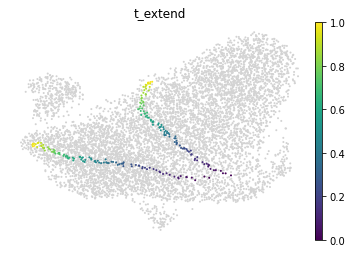

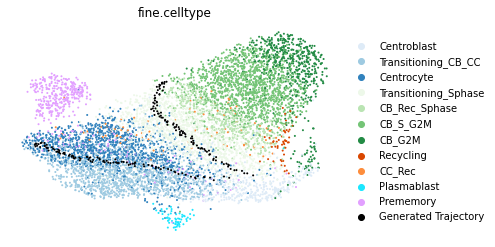

In [67]:
import anndata

# generated rna adata
adata_rna_generated = anndata.AnnData(x_pred_mean)
adata_rna_generated.var_names = adata_rna_pred.var_names.copy()
adata_rna_generated.var = adata_rna_pred.var.copy()
adata_rna_generated.obs_names = [f'generated_cell_{i}' for i in range(n_terminal_cells*n_points)]
adata_rna_generated.obs['t_extend'] = t_extend
adata_rna_generated.obs['Lineage'] = ['Cell Cycle'] * n_points + ['Centrocyte'] * n_points
adata_rna_generated.obs['fine.celltype'] = 'Generated Trajectory'
adata_rna_generated.layers['vx_pred_mean'] = vx_pred_mean
adata_rna_generated.layers['x_pred_std'] = x_pred_std
adata_rna_generated.layers['vx_pred_std'] = vx_pred_std

# concatenate generated rna adata
adata_rna_pred_extended = adata_rna_pred.concatenate(adata_rna_generated, batch_key='Source', index_unique=None, batch_categories=['observed', 'generated'])
sc.pp.pca(adata_rna_pred_extended, n_comps=50)
sc.pp.neighbors(adata_rna_pred_extended, n_neighbors=50, use_rep='X_pca')
sc.tl.umap(adata_rna_pred_extended, min_dist=1, spread=1, random_state=0, n_components=2)
sc.pl.umap(adata_rna_pred_extended, color=['t_extend'], cmap='viridis', show=False, frameon=False)
plt.savefig(fig_dir+f'/generated_trajectories_rna_{sample_name}.pdf', bbox_inches="tight")

adata_rna_pred_extended.obs['fine.celltype'] = pd.Categorical(adata_rna_pred_extended.obs['fine.celltype'], categories=['Centroblast', 'Transitioning_CB_CC', 'Centrocyte', 'Transitioning_Sphase', 'CB_Rec_Sphase', 'CB_S_G2M', 'CB_G2M', 'Recycling', 'CC_Rec', 'Plasmablast', 'Prememory', 'Generated Trajectory'], ordered=True)
adata_rna_pred_extended.uns['fine.celltype_colors'] = adata_rna_pred.uns['fine.celltype_colors'] + ['#000000']
sc.pl.umap(adata_rna_pred_extended, color=['fine.celltype'], show=False, frameon=False)
plt.savefig(fig_dir+f'/generated_trajectories_rna_with_celltypes_{sample_name}.pdf', bbox_inches="tight")


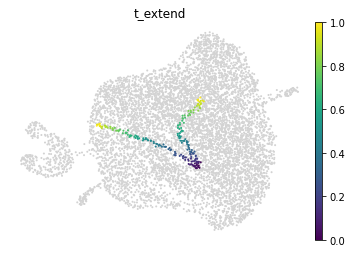

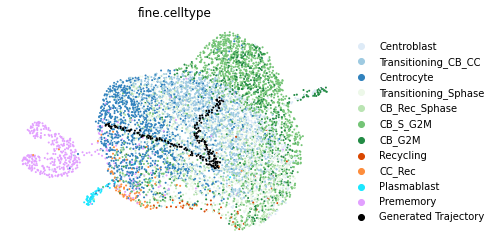

In [68]:
# generated atac adata
adata_atac_generated = anndata.AnnData(y_pred_mean)
adata_atac_generated.var_names = adata_atac_pred.var_names.copy()
adata_atac_generated.var = adata_atac_pred.var.copy()
adata_atac_generated.obs_names = [f'generated_cell_{i}' for i in range(n_terminal_cells*n_points)]
adata_atac_generated.obs['t_extend'] = t_extend
adata_atac_generated.obs['Lineage'] = ['Cell Cycle'] * n_points + ['Centrocyte'] * n_points
adata_atac_generated.obs['fine.celltype'] = 'Generated Trajectory'
adata_atac_generated.layers['vy_pred_mean'] = vy_pred_mean
adata_atac_generated.layers['y_pred_std'] = y_pred_std
adata_atac_generated.layers['vy_pred_std'] = vy_pred_std

# concatenate generated atac adataCC_Spi1_NfKb2_
adata_atac_pred_extended = adata_atac_pred.concatenate(adata_atac_generated, batch_key='Source', index_unique=None, batch_categories=['observed', 'generated'])
sc.pp.pca(adata_atac_pred_extended, n_comps=50)
sc.pp.neighbors(adata_atac_pred_extended, n_neighbors=50, use_rep='X_pca')
sc.tl.umap(adata_atac_pred_extended, min_dist=1, spread=1, random_state=0, n_components=2)
sc.pl.umap(adata_atac_pred_extended, color=['t_extend'], cmap='viridis', show=False, frameon=False)
plt.savefig(fig_dir+f'/generated_trajectories_atac_{sample_name}.pdf', bbox_inches="tight")

adata_atac_pred_extended.obs['fine.celltype'] = pd.Categorical(adata_atac_pred_extended.obs['fine.celltype'], categories=['Centroblast', 'Transitioning_CB_CC', 'Centrocyte', 'Transitioning_Sphase', 'CB_Rec_Sphase', 'CB_S_G2M', 'CB_G2M', 'Recycling', 'CC_Rec', 'Plasmablast', 'Prememory', 'Generated Trajectory'], ordered=True)
adata_atac_pred_extended.uns['fine.celltype_colors'] = adata_atac_pred.uns['fine.celltype_colors'] + ['#000000']
sc.pl.umap(adata_atac_pred_extended, color=['fine.celltype'], show=False, frameon=False)
plt.savefig(fig_dir+f'/generated_trajectories_atac_all_time_with_celltypes_{sample_name}.pdf', bbox_inches="tight")

#### Fig 2E

In [79]:
TFs = adata_atac_pred.var_names
adata_rna_generated = adata_rna_generated[:, TFs]

adata_rna_generated_cc = adata_rna_generated[adata_rna_generated.obs['Lineage']=='Centrocyte']
adata_rna_generated_cb = adata_rna_generated[adata_rna_generated.obs['Lineage']=='Cell Cycle']

adata_atac_generated_cc = adata_atac_generated[adata_atac_generated.obs['Lineage']=='Centrocyte']
adata_atac_generated_cb = adata_atac_generated[adata_atac_generated.obs['Lineage']=='Cell Cycle']

t = adata_rna_generated_cc.obs['t_extend'].values

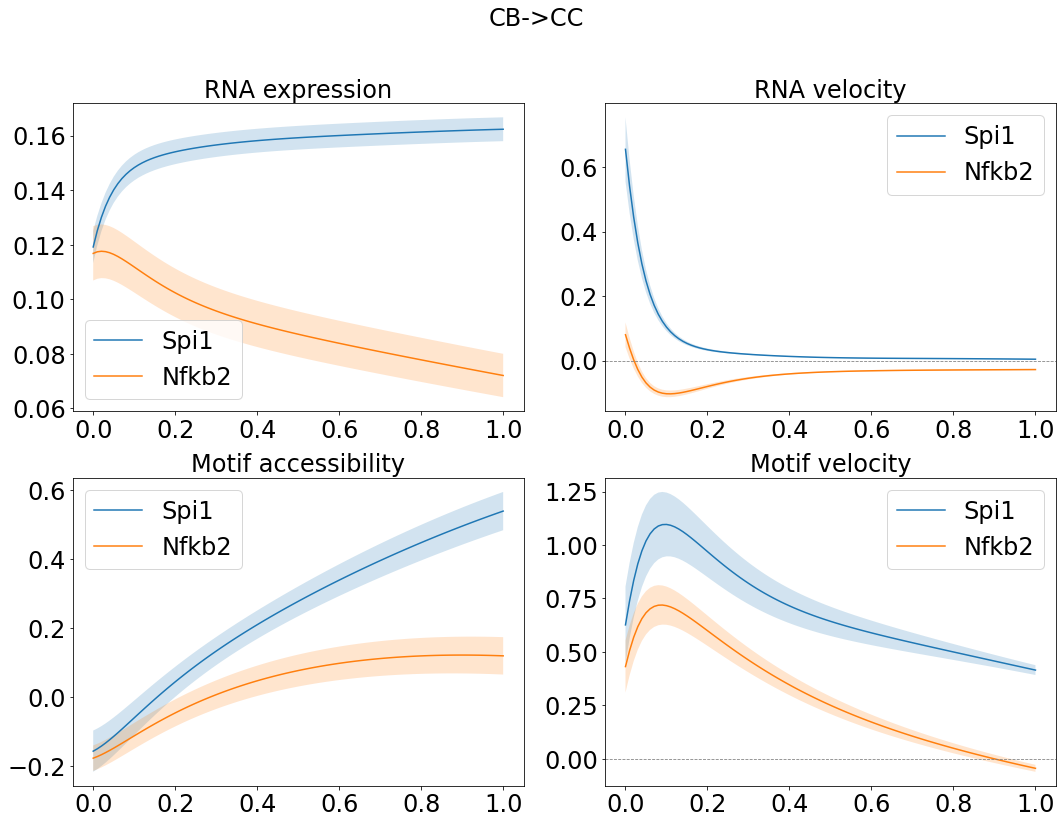

In [73]:
# plot trends of Spi1 and Nfkb2 in CC

x_Spi1 = adata_rna_generated_cc[:,'Spi1'].X.flatten()
vx_Spi1 = adata_rna_generated_cc[:, 'Spi1'].layers['vx_pred_mean'].flatten()

x_std_Spi1 = adata_rna_generated_cc[:, 'Spi1'].layers['x_pred_std'].flatten()
vx_std_Spi1 = adata_rna_generated_cc[:, 'Spi1'].layers['vx_pred_std'].flatten()

x_Nfkb2 = adata_rna_generated_cc[:,'Nfkb2'].X.flatten()
vx_Nfkb2 = adata_rna_generated_cc[:, 'Nfkb2'].layers['vx_pred_mean'].flatten()

x_std_Nfkb2 = adata_rna_generated_cc[:, 'Nfkb2'].layers['x_pred_std'].flatten()
vx_std_Nfkb2 = adata_rna_generated_cc[:, 'Nfkb2'].layers['vx_pred_std'].flatten()

y_Spi1 = adata_atac_generated_cc[:,'Spi1'].X.flatten()
vy_Spi1 = adata_atac_generated_cc[:, 'Spi1'].layers['vy_pred_mean'].flatten()

y_std_Spi1 = adata_atac_generated_cc[:, 'Spi1'].layers['y_pred_std'].flatten()
vy_std_Spi1 = adata_atac_generated_cc[:, 'Spi1'].layers['vy_pred_std'].flatten()

y_Nfkb2 = adata_atac_generated_cc[:,'Nfkb2'].X.flatten()
vy_Nfkb2 = adata_atac_generated_cc[:, 'Nfkb2'].layers['vy_pred_mean'].flatten()

y_std_Nfkb2 = adata_atac_generated_cc[:, 'Nfkb2'].layers['y_pred_std'].flatten()
vy_std_Nfkb2 = adata_atac_generated_cc[:, 'Nfkb2'].layers['vy_pred_std'].flatten()

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('CB->CC', fontsize=24)

axs[0, 0].plot(t, x_Spi1, label='Spi1')
axs[0, 0].fill_between(t, x_Spi1 - (1.96 * x_std_Spi1/np.sqrt(n_rep)), x_Spi1 + (1.96 * x_std_Spi1/np.sqrt(n_rep)), alpha=0.2)
axs[0, 0].plot(t, x_Nfkb2, label='Nfkb2')
axs[0, 0].fill_between(t, x_Nfkb2 - (1.96 * x_std_Nfkb2/np.sqrt(n_rep)), x_Nfkb2 + (1.96 * x_std_Nfkb2/np.sqrt(n_rep)), alpha=0.2)
axs[0, 0].set_title('RNA expression', fontsize=24)
axs[0, 0].legend(fontsize=24)
axs[0, 0].tick_params(axis='both', which='major', labelsize=24)

axs[0, 1].plot(t, vx_Spi1, label='Spi1')
axs[0, 1].fill_between(t, vx_Spi1 - (1.96 * vx_std_Spi1/np.sqrt(n_rep)), vx_Spi1 + (1.96 * vx_std_Spi1/np.sqrt(n_rep)), alpha=0.2)
axs[0, 1].plot(t, vx_Nfkb2, label='Nfkb2')
axs[0, 1].fill_between(t, vx_Nfkb2 - (1.96 * vx_std_Nfkb2/np.sqrt(n_rep)), vx_Nfkb2 + (1.96 * vx_std_Nfkb2/np.sqrt(n_rep)), alpha=0.2)
axs[0, 1].axhline(0, color='gray', linewidth=0.8, linestyle='--')
axs[0, 1].set_title('RNA velocity', fontsize=24)
axs[0, 1].legend(fontsize=24)
axs[0, 1].tick_params(axis='both', which='major', labelsize=24)

axs[1, 0].plot(t, y_Spi1, label='Spi1')
axs[1, 0].fill_between(t, y_Spi1 - (1.96 * y_std_Spi1/np.sqrt(n_rep)), y_Spi1 + (1.96 * y_std_Spi1/np.sqrt(n_rep)), alpha=0.2)
axs[1, 0].plot(t, y_Nfkb2, label='Nfkb2')
axs[1, 0].fill_between(t, y_Nfkb2 - (1.96 * y_std_Nfkb2/np.sqrt(n_rep)), y_Nfkb2 + (1.96 * y_std_Nfkb2/np.sqrt(n_rep)), alpha=0.2)
axs[1, 0].set_title('Motif accessibility', fontsize=24)
axs[1, 0].legend(fontsize=24)
axs[1, 0].tick_params(axis='both', which='major', labelsize=24)

axs[1, 1].plot(t, vy_Spi1, label='Spi1')
axs[1, 1].fill_between(t, vy_Spi1 - (1.96 * vy_std_Spi1/np.sqrt(n_rep)), vy_Spi1 + (1.96 * vy_std_Spi1/np.sqrt(n_rep)), alpha=0.2)
axs[1, 1].plot(t, vy_Nfkb2, label='Nfkb2')
axs[1, 1].fill_between(t, vy_Nfkb2 - (1.96 * vy_std_Nfkb2/np.sqrt(n_rep)), vy_Nfkb2 + (1.96 * vy_std_Nfkb2/np.sqrt(n_rep)), alpha=0.2)
axs[1, 1].axhline(0, color='gray', linewidth=0.8, linestyle='--')
axs[1, 1].set_title('Motif velocity', fontsize=24)
axs[1, 1].legend(fontsize=24)
axs[1, 1].tick_params(axis='both', which='major', labelsize=24)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
plt.savefig(fig_dir+f'/CB_to_CC_Spi1_NfKb2_{sample_name}.pdf')
plt.close('all')

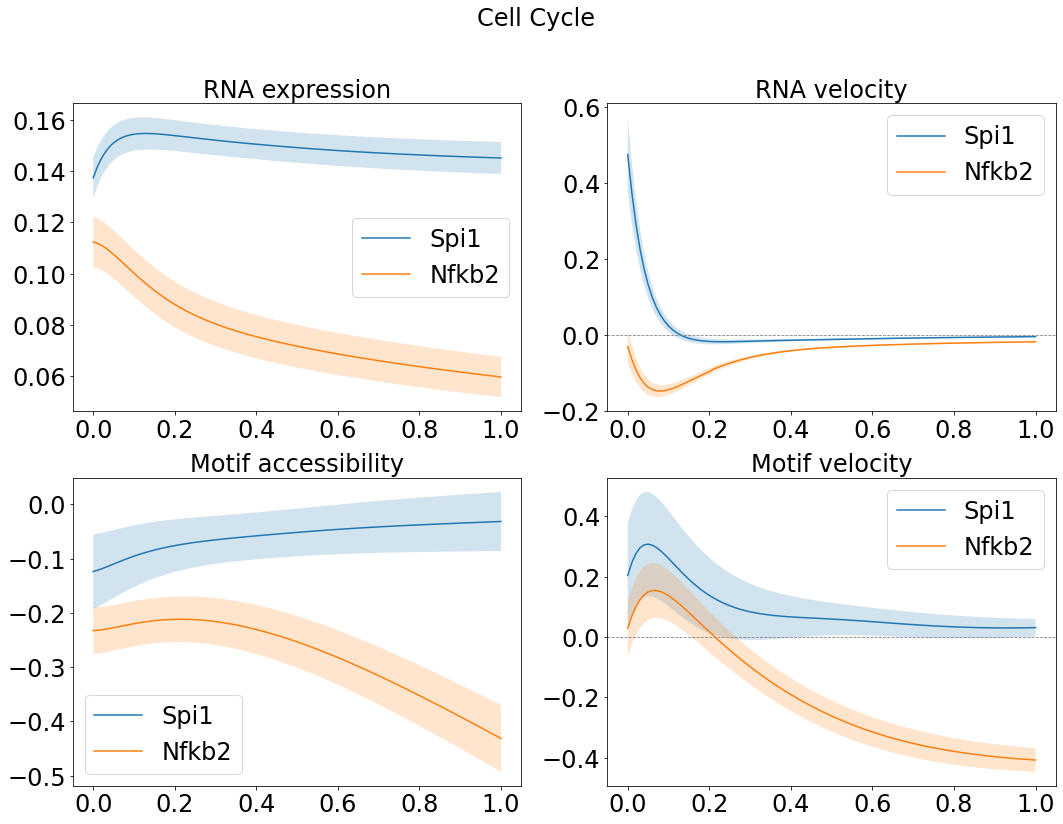

In [80]:
# plot trends of Spi1 and Nfkb2 in CB

x_Spi1 = adata_rna_generated_cb[:,'Spi1'].X.flatten()
vx_Spi1 = adata_rna_generated_cb[:, 'Spi1'].layers['vx_pred_mean'].flatten()

x_std_Spi1 = adata_rna_generated_cb[:, 'Spi1'].layers['x_pred_std'].flatten()
vx_std_Spi1 = adata_rna_generated_cb[:, 'Spi1'].layers['vx_pred_std'].flatten()

x_Nfkb2 = adata_rna_generated_cb[:,'Nfkb2'].X.flatten()
vx_Nfkb2 = adata_rna_generated_cb[:, 'Nfkb2'].layers['vx_pred_mean'].flatten()

x_std_Nfkb2 = adata_rna_generated_cb[:, 'Nfkb2'].layers['x_pred_std'].flatten()
vx_std_Nfkb2 = adata_rna_generated_cb[:, 'Nfkb2'].layers['vx_pred_std'].flatten()

y_Spi1 = adata_atac_generated_cb[:,'Spi1'].X.flatten()
vy_Spi1 = adata_atac_generated_cb[:, 'Spi1'].layers['vy_pred_mean'].flatten()

y_std_Spi1 = adata_atac_generated_cb[:, 'Spi1'].layers['y_pred_std'].flatten()
vy_std_Spi1 = adata_atac_generated_cb[:, 'Spi1'].layers['vy_pred_std'].flatten()

y_Nfkb2 = adata_atac_generated_cb[:,'Nfkb2'].X.flatten()
vy_Nfkb2 = adata_atac_generated_cb[:, 'Nfkb2'].layers['vy_pred_mean'].flatten()

y_std_Nfkb2 = adata_atac_generated_cb[:, 'Nfkb2'].layers['y_pred_std'].flatten()
vy_std_Nfkb2 = adata_atac_generated_cb[:, 'Nfkb2'].layers['vy_pred_std'].flatten()

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Cell Cycle', fontsize=24)

axs[0, 0].plot(t, x_Spi1, label='Spi1')
axs[0, 0].fill_between(t, x_Spi1 - (1.96 * x_std_Spi1/np.sqrt(n_rep)), x_Spi1 + (1.96 * x_std_Spi1/np.sqrt(n_rep)), alpha=0.2)
axs[0, 0].plot(t, x_Nfkb2, label='Nfkb2')
axs[0, 0].fill_between(t, x_Nfkb2 - (1.96 * x_std_Nfkb2/np.sqrt(n_rep)), x_Nfkb2 + (1.96 * x_std_Nfkb2/np.sqrt(n_rep)), alpha=0.2)
axs[0, 0].set_title('RNA expression', fontsize=24)
axs[0, 0].legend(fontsize=24)
axs[0, 0].tick_params(axis='both', which='major', labelsize=24)

axs[0, 1].plot(t, vx_Spi1, label='Spi1')
axs[0, 1].fill_between(t, vx_Spi1 - (1.96 * vx_std_Spi1/np.sqrt(n_rep)), vx_Spi1 + (1.96 * vx_std_Spi1/np.sqrt(n_rep)), alpha=0.2)
axs[0, 1].plot(t, vx_Nfkb2, label='Nfkb2')
axs[0, 1].fill_between(t, vx_Nfkb2 - (1.96 * vx_std_Nfkb2/np.sqrt(n_rep)), vx_Nfkb2 + (1.96 * vx_std_Nfkb2/np.sqrt(n_rep)), alpha=0.2)
axs[0, 1].axhline(0, color='gray', linewidth=0.8, linestyle='--')
axs[0, 1].set_title('RNA velocity', fontsize=24)
axs[0, 1].legend(fontsize=24)
axs[0, 1].tick_params(axis='both', which='major', labelsize=24)

axs[1, 0].plot(t, y_Spi1, label='Spi1')
axs[1, 0].fill_between(t, y_Spi1 - (1.96 * y_std_Spi1/np.sqrt(n_rep)), y_Spi1 + (1.96 * y_std_Spi1/np.sqrt(n_rep)), alpha=0.2)
axs[1, 0].plot(t, y_Nfkb2, label='Nfkb2')
axs[1, 0].fill_between(t, y_Nfkb2 - (1.96 * y_std_Nfkb2/np.sqrt(n_rep)), y_Nfkb2 + (1.96 * y_std_Nfkb2/np.sqrt(n_rep)), alpha=0.2)
axs[1, 0].set_title('Motif accessibility', fontsize=24)
axs[1, 0].legend(fontsize=24)
axs[1, 0].tick_params(axis='both', which='major', labelsize=24)

axs[1, 1].plot(t, vy_Spi1, label='Spi1')
axs[1, 1].fill_between(t, vy_Spi1 - (1.96 * vy_std_Spi1/np.sqrt(n_rep)), vy_Spi1 + (1.96 * vy_std_Spi1/np.sqrt(n_rep)), alpha=0.2)
axs[1, 1].plot(t, vy_Nfkb2, label='Nfkb2')
axs[1, 1].fill_between(t, vy_Nfkb2 - (1.96 * vy_std_Nfkb2/np.sqrt(n_rep)), vy_Nfkb2 + (1.96 * vy_std_Nfkb2/np.sqrt(n_rep)), alpha=0.2)
axs[1, 1].axhline(0, color='gray', linewidth=0.8, linestyle='--')
axs[1, 1].set_title('Motif velocity', fontsize=24)
axs[1, 1].legend(fontsize=24)
axs[1, 1].tick_params(axis='both', which='major', labelsize=24)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
plt.savefig(fig_dir+f'/Cell_Cycle_Spi1_NfKb2_{sample_name}.pdf')
plt.close('all')